### Analysis of lemmatized words and bigrams

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from collections import Counter
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from MulticoreTSNE import MulticoreTSNE as TSNE
from math import log
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix 
#from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dianabursac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dianabursac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dianabursac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
final1 = pd.read_csv('final_Rating.csv')

In [4]:
final1['App Name'].value_counts()

Maps - Navigation & Transit                           206848
Waze - GPS, Maps, Traffic Alerts & Live Navigation    150515
Google Maps - GPS Navigation                           27524
Waze Navigation & Live Traffic                         12705
HERE WeGo - Offline Maps & GPS                         10008
                                                       ...  
Bye"                                                       1
Im sure these are in the works ;)                         1
Does Waze incorporate traffic signals                      1
    Version 4.31.0.1 has major issues:                     1
Will see how the recent voice changes work next...         1
Name: App Name, Length: 983, dtype: int64

In [5]:
final = final1.set_index('App Name').loc[['Maps - Navigation & Transit','Waze - GPS, Maps, Traffic Alerts & Live Navigation',\
                                 'Google Maps - GPS Navigation','Waze Navigation & Live Traffic',\
                                 'HERE WeGo - Offline Maps & GPS','HERE WeGo - City navigation'], :]

In [6]:
final.reset_index(inplace = True)

In [7]:
final["App Name"].value_counts()

Maps - Navigation & Transit                           206848
Waze - GPS, Maps, Traffic Alerts & Live Navigation    150515
Google Maps - GPS Navigation                           27524
Waze Navigation & Live Traffic                         12705
HERE WeGo - Offline Maps & GPS                         10008
HERE WeGo - City navigation                              728
Name: App Name, dtype: int64

In [8]:
final['App Name'].replace({'Maps - Navigation & Transit':'Google Maps' , 'Google Maps - GPS Navigation':'Google Maps',
                'Waze - GPS, Maps, Traffic Alerts & Live Navigation':'Waze', 
                'Waze Navigation & Live Traffic':'Waze',
                'HERE WeGo - Offline Maps & GPS': 'HERE WeGo','HERE WeGo - City navigation': 'HERE WeGo'}, inplace = True)

In [9]:
final['App Name'].value_counts()

Google Maps    234372
Waze           163220
HERE WeGo       10736
Name: App Name, dtype: int64

### Most common lemmas and bigrams

In [10]:
### SPLIT Line

def split(line):
    return str(line).split()


### STOP WORDS

stop = stopwords.words('english')
def clean_stop_words(line):
    words = [item for item in line if item not in stop ]
    return words

# Part-Of-Speech Tagging (POS) is a process of assigning parts of speech to each word, 
# such as noun, verb, adjective, etc

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# LEMMATIZATION
lemmatizer = WordNetLemmatizer()
def lemmatize_text(line):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in line]

# BIGRAMS
def bigrams(line):
    return list(nltk.bigrams((line)))

In [11]:
final['split_text'] = final["cleaned_text"].apply(lambda x : split(x))
final['cleaned_noStop'] = final['split_text'].apply(lambda x: clean_stop_words(x))
final['cleaned_noStop'] = final['split_text'].apply(lambda x: clean_stop_words(x))
final['lemmat'] = final['cleaned_noStop'].apply(lambda x: lemmatize_text(x))
final['bigrams'] = final['lemmat'].apply(lambda x: bigrams(x))

In [12]:
### COUNT MOST COMMON WORDS

def count_most_common(p, data):
    count = Counter()
    for word in data:
        count.update(word) 
    return count.most_common(p)

In [13]:
### Top 25 words after removing stop words

data = final.loc[:,'cleaned_noStop']
p = 25
all_count_25_top = count_most_common(p, data = final.loc[:,'cleaned_noStop'])


### Top 25 words after removing stop words and after lemmatization

p = 25
data = final['lemmat']
all_lemmat_25_top = count_most_common(p, data)


### Top 25 bigrams with the highest frequencies after removing stop words and after lemmatization

data = final['bigrams']
p = 25
all_bigrams_25_top = count_most_common(p =25, data = final.loc[:,'bigrams'])

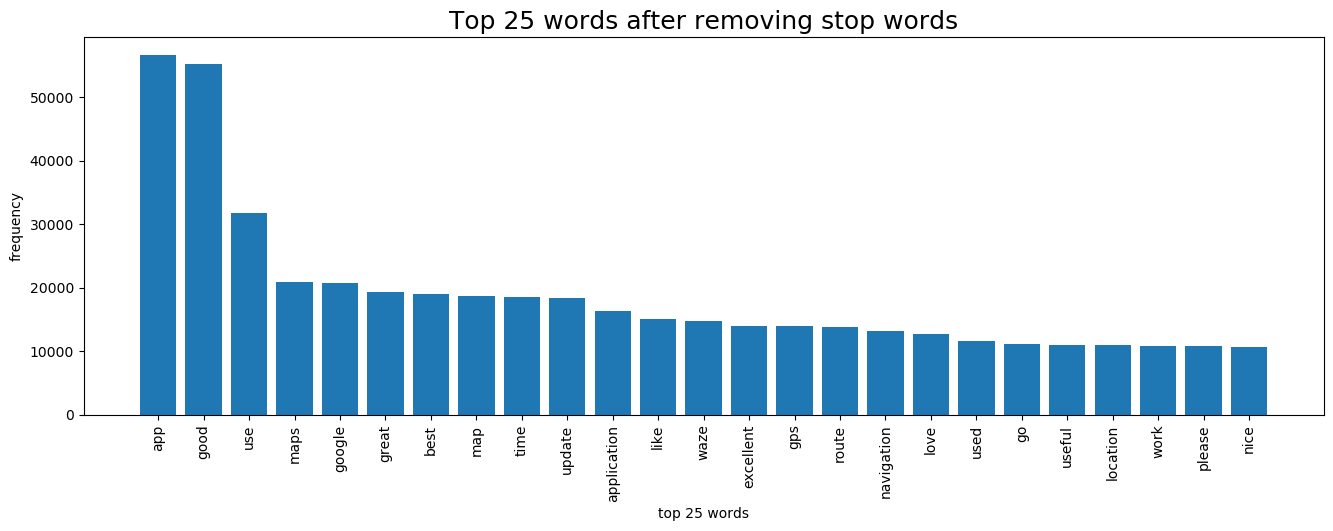

In [14]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*all_count_25_top)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('top 25 words')
plt.title('Top 25 words after removing stop words', fontsize=18)
plt.show()

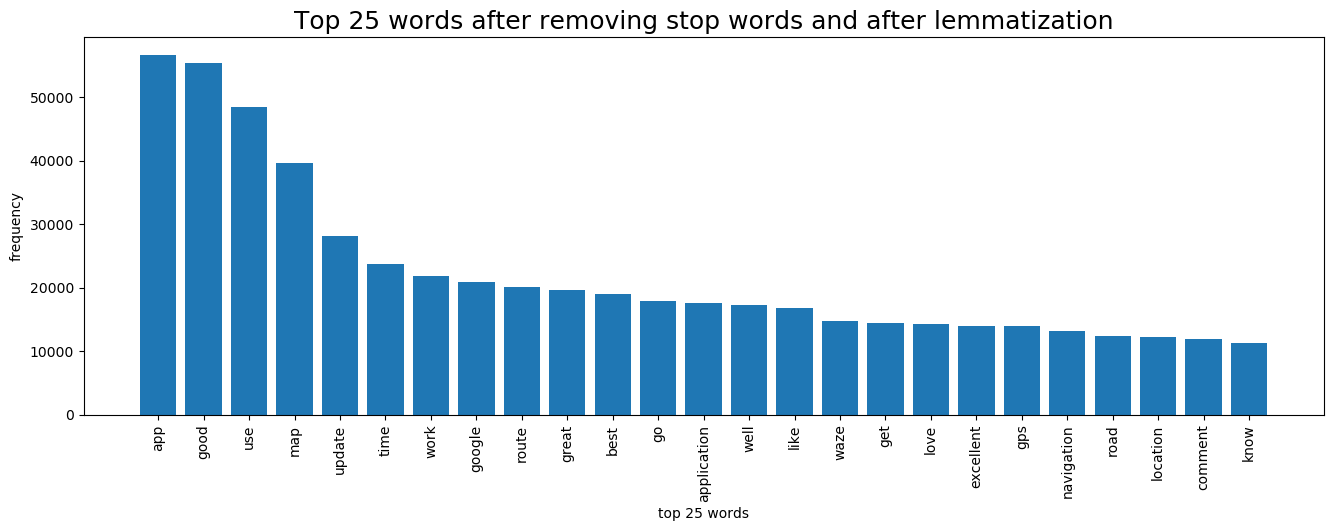

In [15]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*all_lemmat_25_top)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('top 25 words')
plt.title('Top 25 words after removing stop words and after lemmatization', fontsize=18)
plt.show()

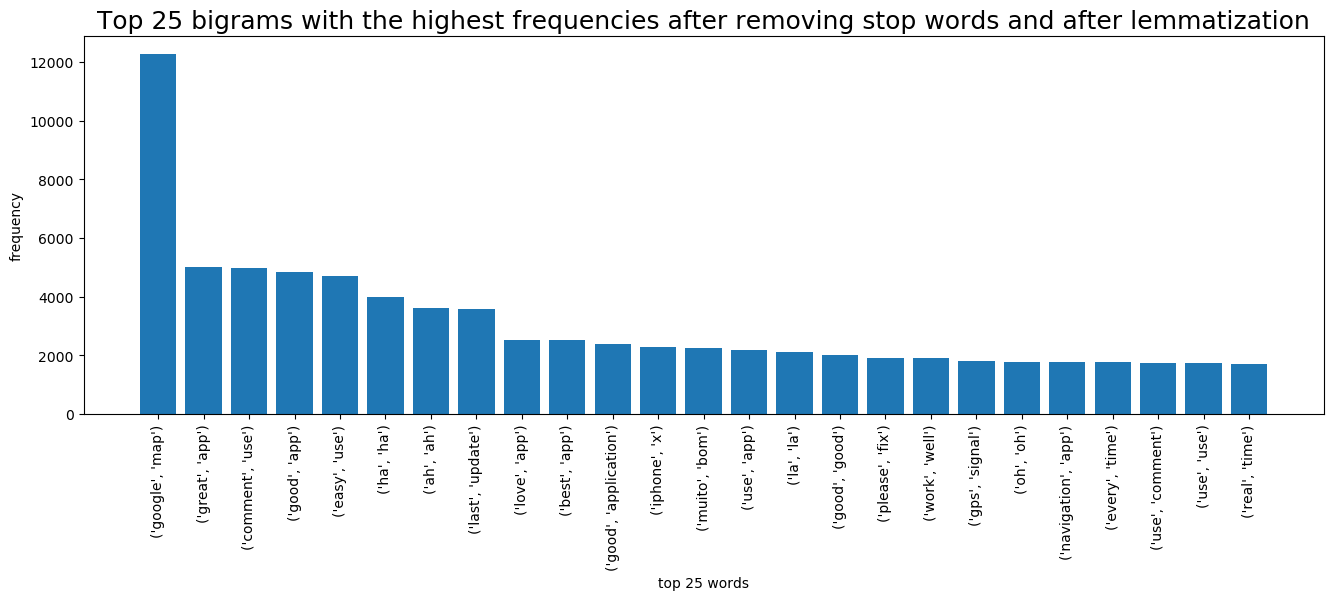

In [16]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*all_bigrams_25_top)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('top 25 words')
plt.title('Top 25 bigrams with the highest frequencies after removing stop words and after lemmatization', fontsize=18)
plt.show()

In [17]:
def bigrams_to_string(line):
    w = [str(w) for w in line]
    return w


def delete_str(line, str_list):
    line = [w for w in line if w not in str_list ]
    return line

final['bigrams_str'] = final['bigrams'].apply(lambda x : bigrams_to_string(x) )

final['bigrams_clean'] = final['bigrams_str'].apply(lambda x: delete_str(x, \
["('chicken', 'spicy')","('schifo', 'schifo')","('dai', 'dai')",\
 "('use', 'use')","('oh', 'oh')","('la', 'la')", "('ah', 'ah')", "('ha', 'ha')", "('用', '不能')", "('用不了', '用不了')"]))

all_bigrams_25_top = count_most_common(p =25, data = final.loc[:,'bigrams_clean'])

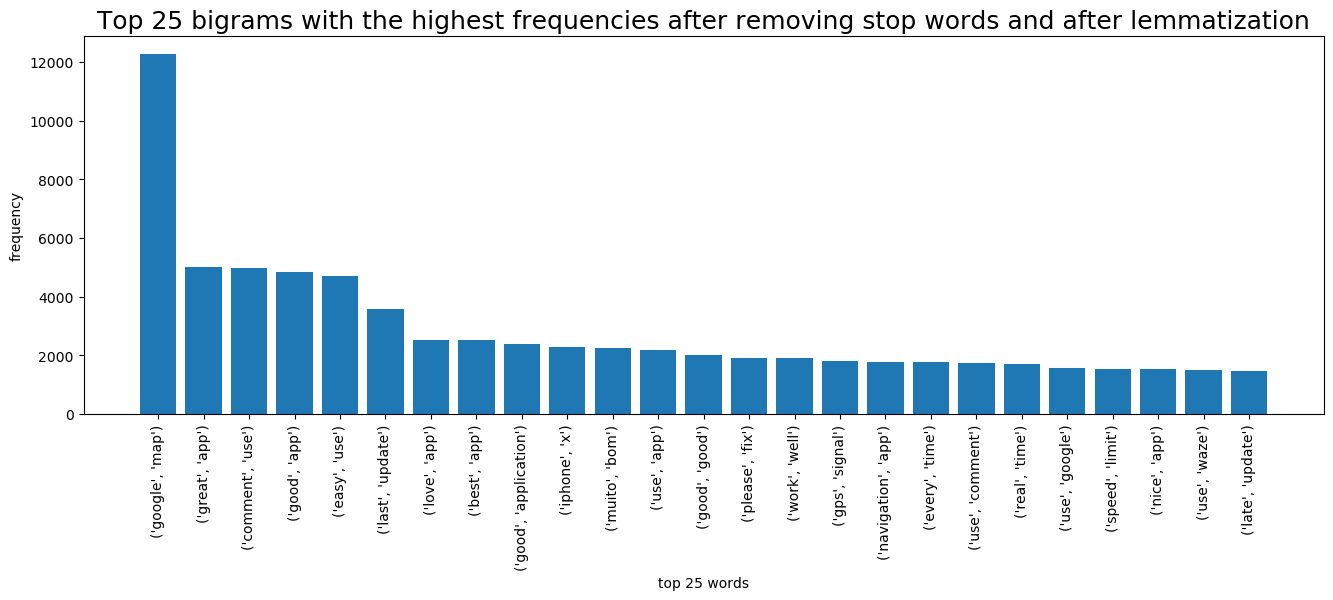

In [18]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*all_bigrams_25_top)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('top 25 words')
plt.title('Top 25 bigrams with the highest frequencies after removing stop words and after lemmatization', fontsize=18)
plt.show()

### Statistical breakdown of the word frequency

In [19]:
def count_total_all_words(data):
    count = Counter()
    for word in data:
        count.update(word) 
    return count

In [20]:
### COUNT ALL

count_all_words = count_total_all_words(final.loc[:,'cleaned_noStop'])
count_all_lemmat = count_total_all_words(final.loc[:,'lemmat'])
count_all_bigrams = count_total_all_words(final.loc[:,'bigrams_clean'])


In [21]:
### BIGRAMS

all_bigrams_array = np.array(list(count_all_bigrams.values()))
mean = np.mean(all_bigrams_array)
std = np.std(all_bigrams_array) 
CV= float(std)/mean

median = np.median(all_bigrams_array)
p_25 = np.percentile(all_bigrams_array, 25) 
p_50 = np.percentile(all_bigrams_array, 50) 
p_75 = np.percentile(all_bigrams_array, 75)
p_95 = np.percentile(all_bigrams_array, 95)
p_99 = np.percentile(all_bigrams_array, 99)
p_995 = np.percentile(all_bigrams_array, 99.5)
p_998 = np.percentile(all_bigrams_array, 99.8) 
p_100 = np.percentile(all_bigrams_array, 100) 
print (median)
print (p_25, p_50, p_75, p_95, p_99,p_995,p_998, p_100)

1.0
1.0 1.0 2.0 7.0 26.0 46.0 90.0 12256.0


#### Conclusion:  Analysis of bigrams
- The most common bigram appears more than 12k times
- There are more than 800k unique bigrams in the data set
- The frequency distribution of bigrams is skewed: mean is 2.74 and medium is 1 (50% of bigrams have a freq. that equals 1)
- 75% of bigrams have a freq. 1 or 2, 95% of bigrams have a freq. 7 or less, 99.8 % of bigrams have a freq. 90 or less

In [22]:
### LEMMAS

all_lemmas_array = np.array(list(count_all_lemmat.values()))
mean = np.mean(all_lemmas_array)
std = np.std(all_lemmas_array) 
CV= float(std)/mean

median = np.median(all_lemmas_array)
p_25 = np.percentile(all_lemmas_array, 25) 
p_50 = np.percentile(all_lemmas_array, 50) 
p_75 = np.percentile(all_lemmas_array, 75)
p_95 = np.percentile(all_lemmas_array, 95)
p_99 = np.percentile(all_lemmas_array, 99)
p_995 = np.percentile(all_lemmas_array, 99.5)
p_998 = np.percentile(all_lemmas_array, 99.8) 
p_100 = np.percentile(all_lemmas_array, 100) 
print (median)
print (p_25, p_50, p_75, p_95, p_99,p_995,p_998, p_100)

1.0
1.0 1.0 3.0 38.0 416.0 1007.0 2533.480000000098 56581.0


#### Conclusion: Analysis of lemmatized words
- The most common word appears 56k times.
- There are more than 86k unique lemmatized words in the data set
- The frequency distribution of lemmatized words is highly skewed: the mean is 32 and medium is 1 (50% of words have frequency that equals 1)
- 75% of words have a frequency of 3 or less, 85% of words have a frequency of 38 or less, 99 % of words have a frequency 1000 or less

### Words from different Rating 1 and Rating 5 reviews have different sentiment

In [23]:
dataR1 = final.loc[final.Rating == 1,'bigrams_clean']
all_words_R1= count_total_all_words(dataR1)
dataR5 = final.loc[final.Rating == 5,'bigrams_clean']
all_words_R5 = count_total_all_words(dataR5)   
      
vR1 = [[item, f] for (item, f) in list(all_words_R1.items()) if f > 90 and  f < 100]
vR5 = [[item, f] for (item, f) in list(all_words_R5.items()) if f > 90 and  f < 100]


In [24]:
dataR1_l = final.loc[final.Rating == 1,'lemmat']
all_lemmat_R1= count_total_all_words(dataR1_l)
dataR5_l = final.loc[final.Rating == 5,'lemmat']
all_lemmat_R5 = count_total_all_words(dataR5_l)   
      
vR1_l = [[item, f] for (item, f) in list(all_lemmat_R1.items()) if f > 250 and  f < 300]
vR5_l = [[item, f] for (item, f) in list(all_lemmat_R5.items()) if f > 270 and  f < 300]

In [25]:
len(vR1), len(vR5)

(22, 70)

In [26]:
len(vR1_l), len(vR5_l)

(47, 54)

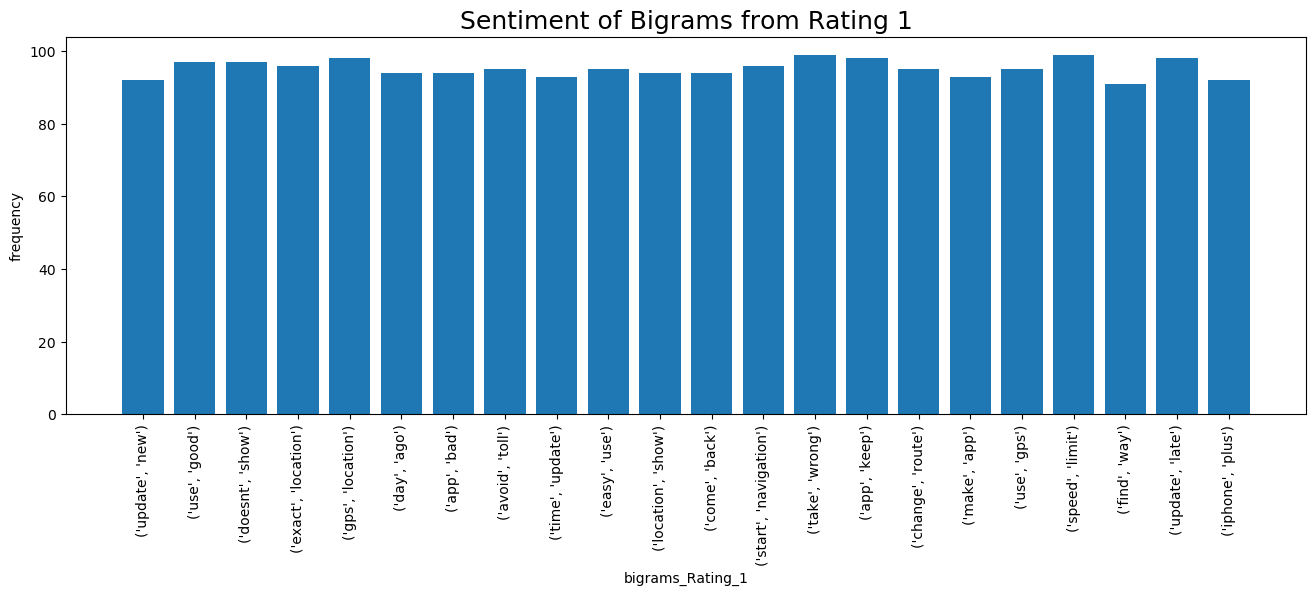

In [27]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*vR1)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('bigrams_Rating_1')
plt.title('Sentiment of Bigrams from Rating 1', fontsize=18)
plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_text(s, 0, flags=flags)


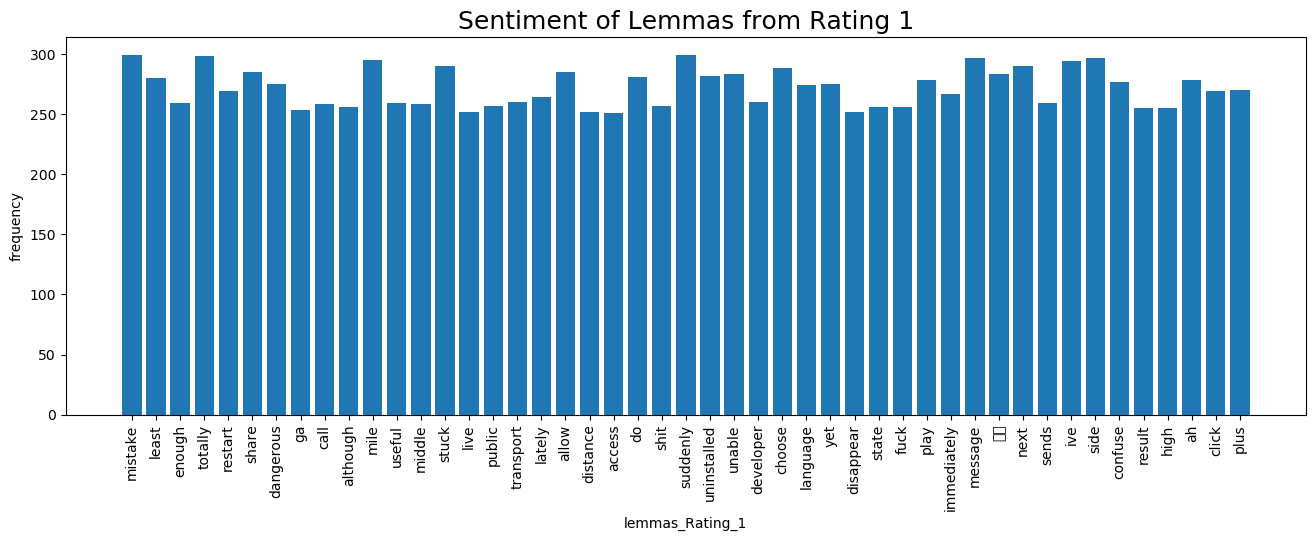

In [28]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*vR1_l)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('lemmas_Rating_1')
plt.title('Sentiment of Lemmas from Rating 1', fontsize=18)
plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 25165 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21834 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 25165 missing from current font.
  font.set_text(s

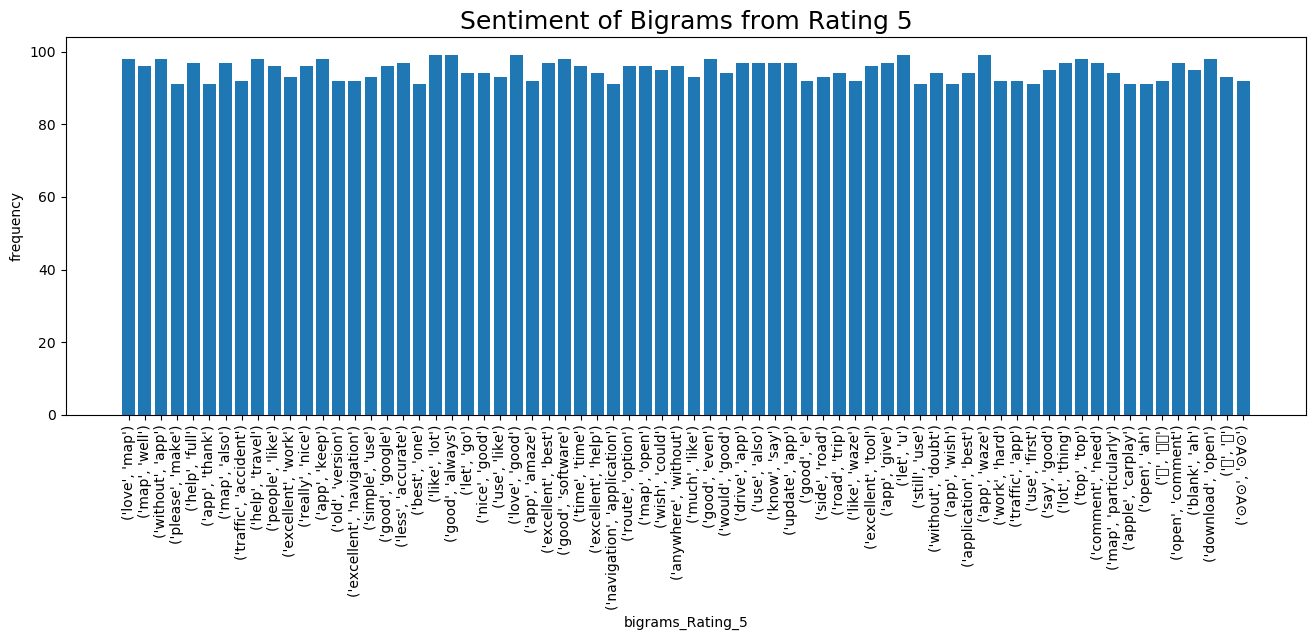

In [29]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*vR5)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('bigrams_Rating_5')
plt.title('Sentiment of Bigrams from Rating 5', fontsize=18)
plt.show()

/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 20102 missing from current font.
  font.set_text(s, 0, flags=flags)


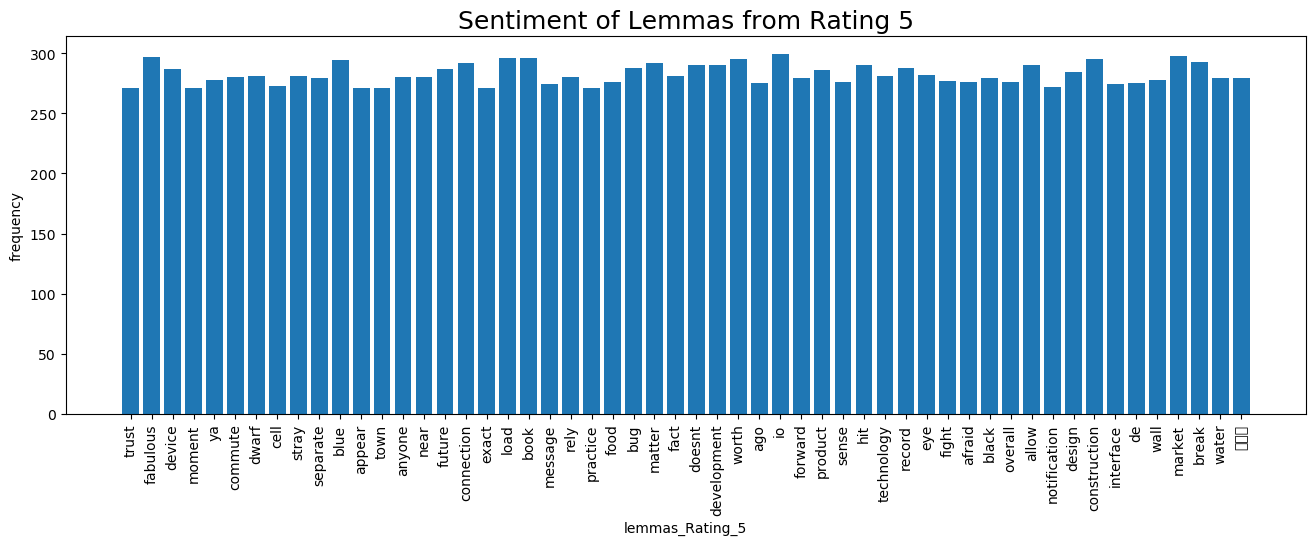

In [30]:
import numpy as np
plt.figure(figsize=(16,5), dpi=100)
x, y = zip(*vR5_l)
x_pos = np.arange(len(x))
plt.bar(x_pos, y, align='center')
plt.xticks(x_pos, x, rotation = 90) 
plt.ylabel('frequency')
plt.xlabel('lemmas_Rating_5')
plt.title('Sentiment of Lemmas from Rating 5', fontsize=18)
plt.show()